In [1]:
import numpy as np, pandas as pd, seaborn as sns

data = pd.read_csv("Telecom_Customer_Churn.csv")

In [2]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data = data.drop('customerID', axis=1)
if data.isnull().values.any() == False:
    print('Go on')
else:
    print('You must check')

Go on


In [4]:
data["TotalCharges"].replace({' ': 'Nan'}, inplace=True)
data["TotalCharges"] = data["TotalCharges"].astype(float)

data.dropna()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [5]:
columns = data.columns

In [6]:
data['Churn'].value_counts(sort=True)

No     5174
Yes    1869
Name: Churn, dtype: int64

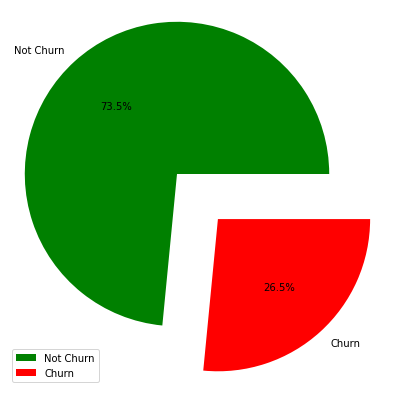

In [7]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

churn = data['Churn'].value_counts(sort=True)

rcParams['figure.figsize']=7,7 
plt.pie(churn, explode=[0.2,0.2], autopct='%1.1f%%', colors=['green', 'red'], labels = ['Not Churn', 'Churn'])
plt.legend()
plt.show()

In [8]:
categorical, binary, numerical = list(), list(), list()
for x in columns:
    if len(data[x].value_counts().index)==2:
        binary.append(x)
    elif len(data[x].value_counts().index)>2 and len(data[x].value_counts().index)<=7:
        categorical.append(x)
    else:
        numerical.append(x)

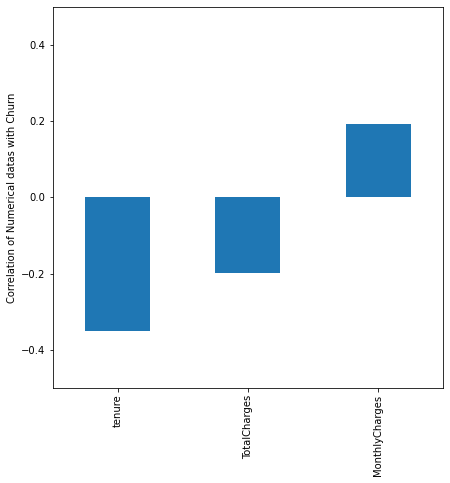

In [9]:
categorical_datas = data[categorical + ['Churn']]
binary_datas = data[binary]
numerical_datas = data[numerical+ ['Churn']]

y = (numerical_datas['Churn'] == 'Yes').astype(int)

correlations = numerical_datas[numerical].corrwith(y)
correlations.sort_values(inplace=True)

ax = correlations.plot(kind='bar')
ax.set_ylim(-0.5, 0.5)
ax.set_ylabel('Correlation of Numerical datas with Churn')
plt.show()

Text(0.5, 1.0, 'TotalCharges')

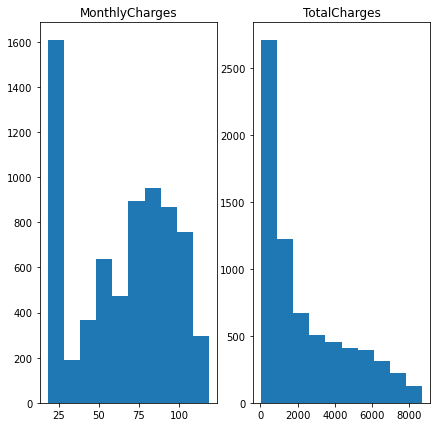

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.hist(numerical_datas['MonthlyCharges'])
ax1.set_title('MonthlyCharges')

ax2.hist(numerical_datas['TotalCharges'])
ax2.set_title('TotalCharges')

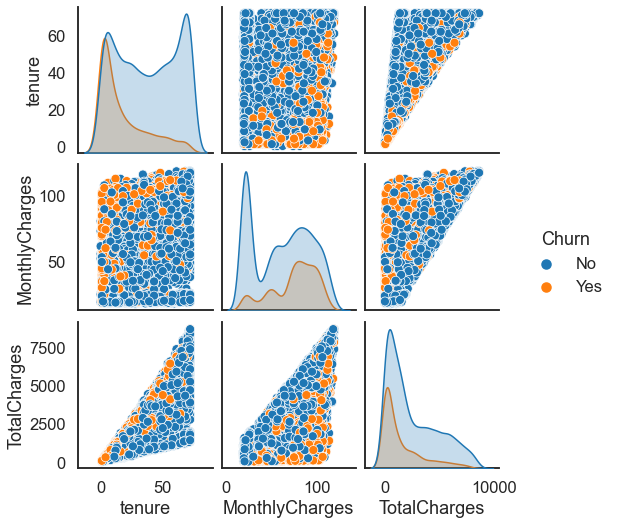

In [11]:
sns.set_context('talk')
sns.set_style('white')

sns.pairplot(numerical_datas, hue='Churn')

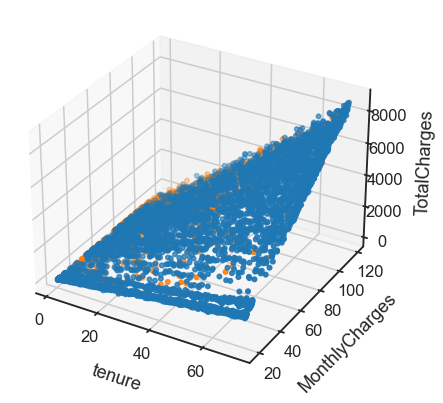

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = numerical_datas.loc[numerical_datas['Churn'] == 'Yes', 'tenure']
y = numerical_datas.loc[numerical_datas['Churn'] == 'Yes', 'MonthlyCharges']
z = numerical_datas.loc[numerical_datas['Churn'] == 'Yes', 'TotalCharges']
ax.scatter(x,y,z, color="tab:orange")

x = numerical_datas.loc[numerical_datas['Churn'] == 'No', 'tenure']
y = numerical_datas.loc[numerical_datas['Churn'] == 'No', 'MonthlyCharges']
z = numerical_datas.loc[numerical_datas['Churn'] == 'No', 'TotalCharges']
ax.scatter(x,y,z, color="tab:blue")

ax.set_xlabel('tenure', labelpad=15)
ax.set_ylabel('MonthlyCharges', labelpad=15)
ax.set_zlabel('TotalCharges', labelpad=15)

plt.show()

In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for x in categorical_datas.columns:
    categorical_datas[x] = le.fit_transform(categorical_datas[x])
    categorical_datas[x].sample(len(categorical_datas[x].value_counts().index))
    
categorical_datas.head()

<ipython-input-59-a1c532ec280b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_datas[x] = le.fit_transform(categorical_datas[x])


,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Churn
0,1,0,0,2,0,0,0,0,0,2,0
1,0,0,2,0,2,0,0,0,1,3,0
2,0,0,2,2,0,0,0,0,0,3,1
3,1,0,2,0,2,2,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,2,1


In [84]:
df_dummies_categorical = pd.get_dummies(categorical_datas)
df_dummies_categorical.head()

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Churn
0,1,0,0,2,0,0,0,0,0,2,0
1,0,0,2,0,2,0,0,0,1,3,0
2,0,0,2,2,0,0,0,0,0,3,1
3,1,0,2,0,2,2,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,2,1


<AxesSubplot:>

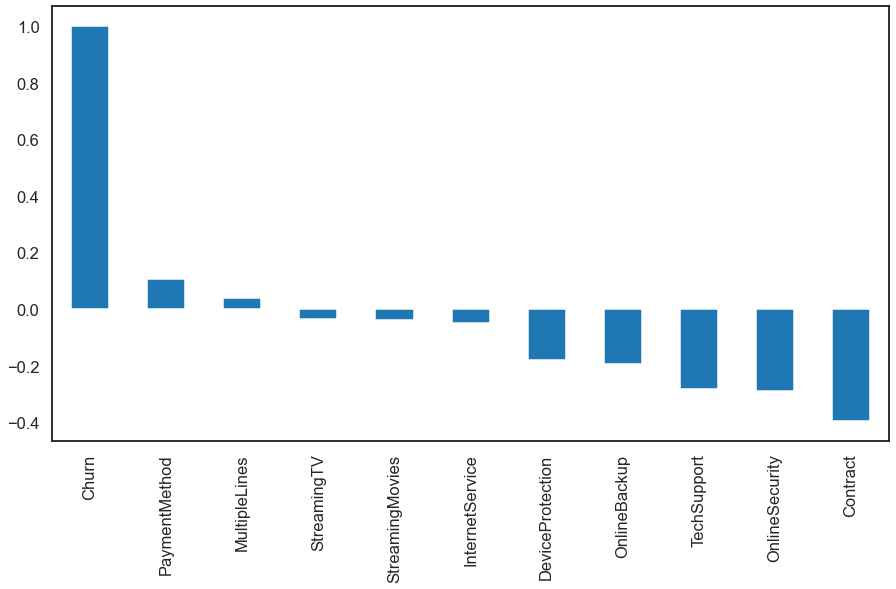

In [85]:
plt.figure(figsize=(15,8))
df_dummies_categorical.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

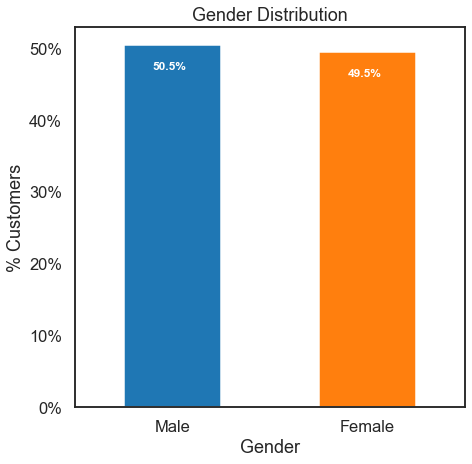

In [93]:
import matplotlib.ticker as mtick

colors = ['tab:blue', 'tab:orange']
ax = (binary_datas['gender'].value_counts()*100.0 /len(binary_datas)).plot(kind='bar', stacked = True, rot = 0, color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

totals = []
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, str(round((i.get_height()/total), 1))+'%', fontsize=12, color='white', weight = 'bold')

Text(0.5, 1.0, '% of Senior Citizens')

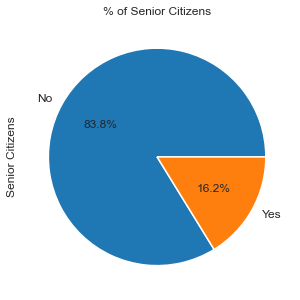

In [94]:
ax = (binary_datas['SeniorCitizen'].value_counts()*100.0 /len(binary_datas)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

In [110]:
colors = ['#4D3425','#E4512B']
partner_dependents = binary_datas.groupby(['Partner','Dependents']).size().unstack()
df = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T

Dependents,No,Yes
Partner,,
No,90.085141,9.914859
Yes,48.589065,51.410935


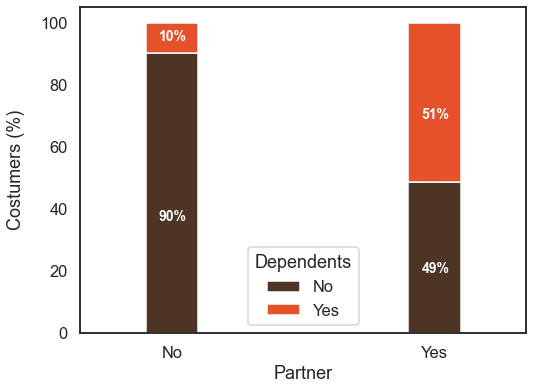

In [113]:
ax = (df.plot(kind='bar', width = 0.2, stacked = True, rot = 0, figsize = (8,6), color = colors))

ax.set_ylabel('Costumers (%)', labelpad=15)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), color = 'white', weight = 'bold', size = 14)
plt.show()

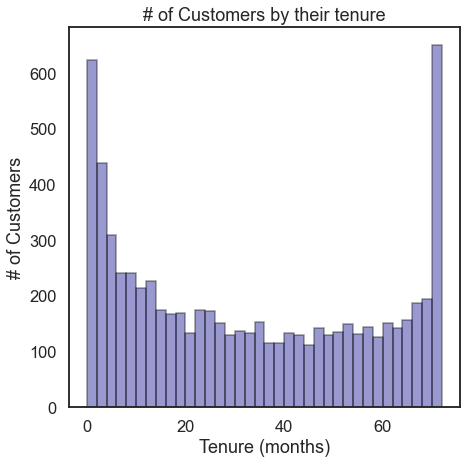

In [117]:
ax = sns.distplot(data['tenure'], hist=True, kde=False, bins=int(180/5), color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')
plt.show()

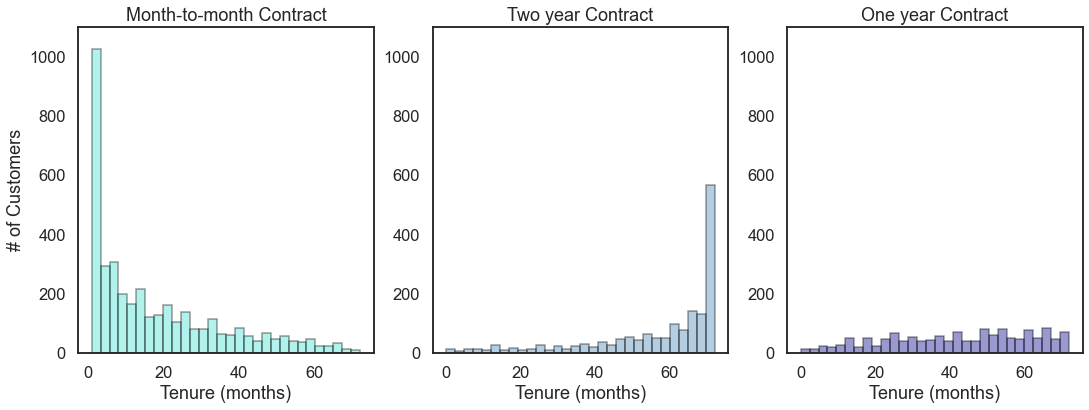

In [143]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize = (18,6))
axs=[ax1,ax2,ax3]

color=['turquoise', 'steelblue', 'darkblue']
contract = data['Contract'].value_counts().index

for i in range(len(contract)):
    ax = sns.distplot(data[data['Contract']==contract[i]]['tenure'], hist=True, kde=False, bins=30, 
                  color = color[i], hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4}, ax=axs[i])
    ax.set_xlabel('Tenure (months)')
    ax.set_title(contract[i] + ' Contract')
    ax.set_ylim(0,1100)
    if i==0:
        ax.set_ylabel('# of Customers')

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

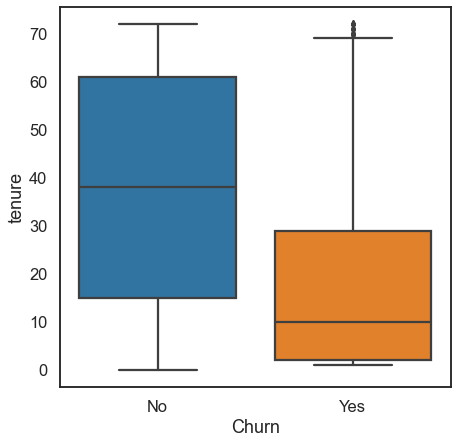

In [144]:
sns.boxplot(x = data.Churn, y = data.tenure)

# Random Forest

### data preparation

In [163]:
data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No',  value=0, inplace=True)
data_dummies = pd.get_dummies(data)

data_dummies.TotalCharges = pd.to_numeric(data_dummies.TotalCharges, errors='coerce')
data_dummies.dropna(inplace=True)

y = data_dummies['Churn'].values
X = data_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

### Classifier

In [207]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
rf.fit(X_train, y_train)

# Make predictions
prediction_test = rf.predict(X_test)
print (accuracy_score(y_test, prediction_test))

0.8179749715585893


<AxesSubplot:>

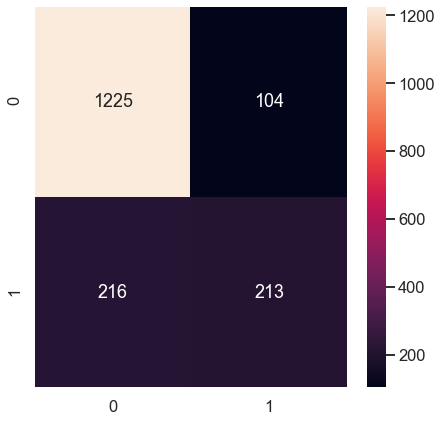

In [208]:
conf_matrix = confusion_matrix(y_test, rf.predict(X_test))

sns.heatmap(conf_matrix, annot=True, fmt='d')

In [209]:
from sklearn.metrics import accuracy_score, roc_auc_score

accuracy = accuracy_score(y_test, rf.predict(X_test))
auc = roc_auc_score(y_test, rf.predict(X_test))

metrics = list()
metrics.append(pd.Series({'accuracy': accuracy,
                               'auc': auc}, name='Random Forest'))
metrics

[accuracy    0.817975
 auc         0.709125
 Name: Random Forest, dtype: float64]

# Logistic Regression (without any penalty)

### Same data for train and test as for Random Forest

### Classifier

In [210]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

prediction_test = lr.predict(X_test)
prediction_test

array([1, 0, 0, ..., 0, 0, 0])

<AxesSubplot:>

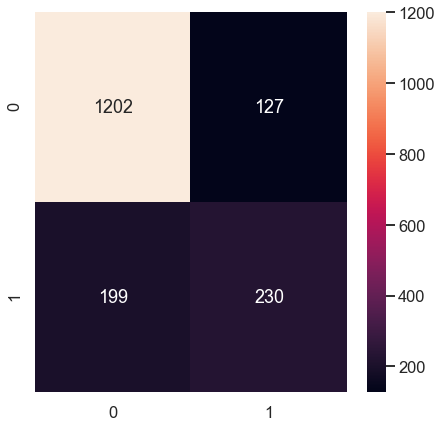

In [211]:
conf_matrix = confusion_matrix(y_test, lr.predict(X_test))
sns.heatmap(conf_matrix, annot=True, fmt='d')

In [212]:
accuracy = accuracy_score(y_test, lr.predict(X_test))
auc = roc_auc_score(y_test, lr.predict(X_test))

metrics.append(pd.Series({'accuracy': accuracy,
                               'auc': auc}, name='Logistic Regression'))
metrics

[accuracy    0.817975
 auc         0.709125
 Name: Random Forest, dtype: float64,
 accuracy    0.814562
 auc         0.720285
 Name: Logistic Regression, dtype: float64]

AxesSubplot(0.125,0.125;0.775x0.755)


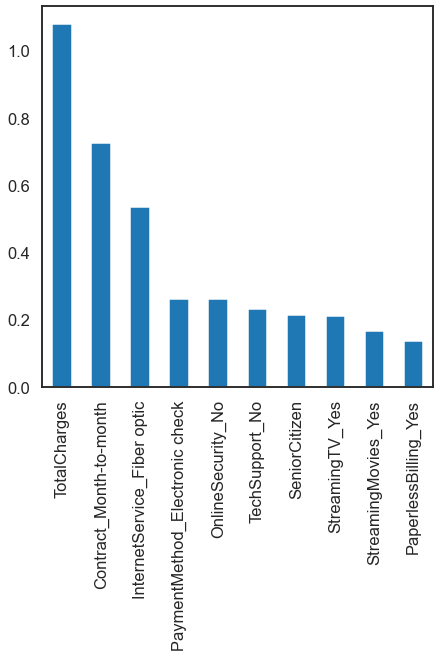

In [213]:
weights = pd.Series(lr.coef_[0], index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

# k-NN

### Same data for train and test as for Random Forest

### Classifier

In [214]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

max_k = 50
f1_score_simple, f1_score_weighted = list(), list()
error_rates_simple, error_rates_weighted = list(), list()
for i in range(1,max_k):
    
    knn_simple = KNeighborsClassifier(n_neighbors=i)
    knn_simple.fit(X_train, y_train)
    y_pred = knn_simple.predict(X_test)
    f = f1_score(y_pred, y_test)
    f1_score_simple.append([i, f])
    error = 1 - round(accuracy_score(y_test, y_pred), 3)
    error_rates_simple.append([i, error])
    
    knn_weighted = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn_weighted.fit(X_train, y_train)
    y_pred = knn_weighted.predict(X_test)
    f = f1_score(y_pred, y_test)
    f1_score_weighted.append([i, f])
    error = 1 - round(accuracy_score(y_test, y_pred), 3)
    error_rates_weighted.append([i, error])

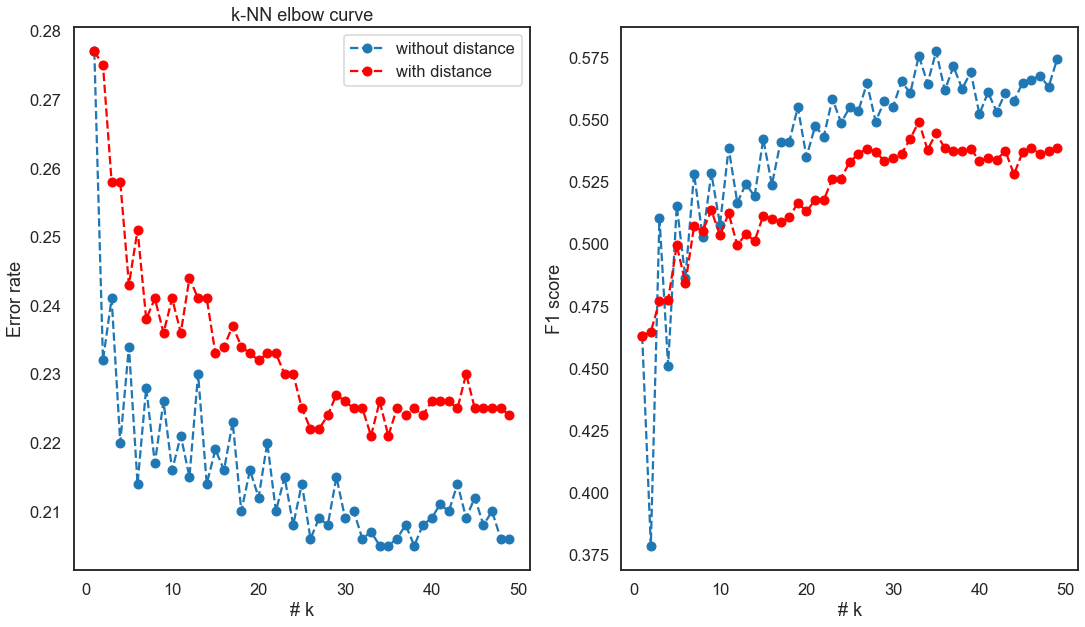

In [215]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches([18,10])

ax[0].plot(np.array(error_rates_simple)[:,0], np.array(error_rates_simple)[:,1], '--o', label='without distance')
ax[0].plot(np.array(error_rates_weighted)[:,0], np.array(error_rates_weighted)[:,1], '--ro', label='with distance')
ax[0].legend()
ax[0].set_title('k-NN elbow curve')
ax[0].set_ylabel('Error rate')
ax[0].set_xlabel('# k')

ax[1].plot(np.array(f1_score_simple)[:,0], np.array(f1_score_simple)[:,1], '--o')
ax[1].plot(np.array(f1_score_weighted)[:,0], np.array(f1_score_weighted)[:,1], '--ro')
ax[1].set_ylabel('F1 score')
ax[1].set_xlabel('# k')

plt.show()

<AxesSubplot:>

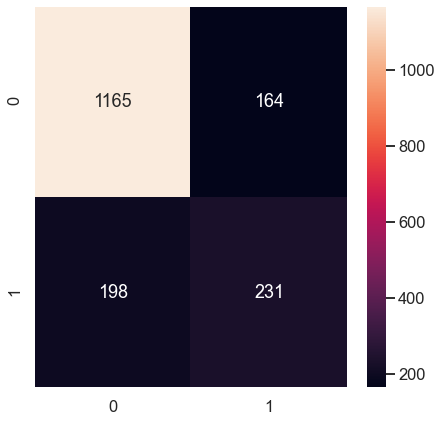

In [216]:
knn = KNeighborsClassifier(n_neighbors=32)
knn.fit(X_train, y_train)
conf_matrix = confusion_matrix(y_test, knn.predict(X_test))

sns.heatmap(conf_matrix, annot=True, fmt='d')

In [217]:
accuracy = accuracy_score(y_test, lr.predict(X_test))
auc = roc_auc_score(y_test, lr.predict(X_test))

metrics.append(pd.Series({'accuracy': accuracy,
                               'auc': auc}, name='k-NN'))
metrics = pd.DataFrame(metrics)

,accuracy,auc
Random Forest,0.817975,0.709125
Logistic Regression,0.814562,0.720285
k-NN,0.814562,0.720285


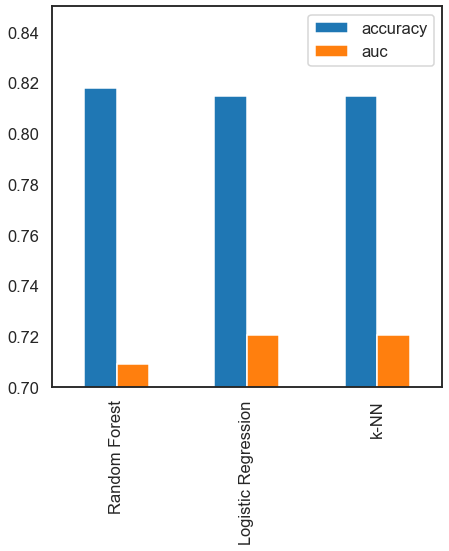

In [223]:
metrics.plot(kind='bar', ylim=(0.7,0.85))
metrics